# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [ ]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

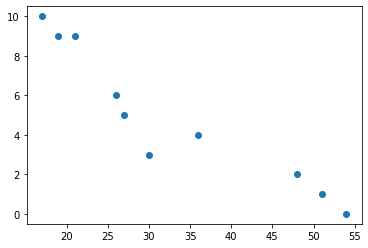

In [ ]:
# Your code here.
plt.scatter(student_data.X, student_data.Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# There appears to be a negative lineat correlation between these two stats

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# Your response here.
print('Covariance: ',student_data.X.cov(student_data.Y))
print('Correlation: ',student_data.Y.corr(student_data.X))
# High covariance means that the two variables vary together, negative values implies an inverse relationship
# Almost -1 correlation means that the variables move together almos exactly the opposite way linearly, when one goes up, the other goes down 

Covariance:  -45.56666666666666
Correlation:  -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here.
X_age = sm.add_constant(student_data.X)
y_tard = student_data.Y
linreg = sm.OLS(y_tard, X_age).fit()
print(linreg.summary())
print('\n\nThe outcome variable is the tardiness, which is observed by changing the age. An Ordinary Least Squares regression was used to model the linear regression')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           5.57e-05
Time:                        11:47:44   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

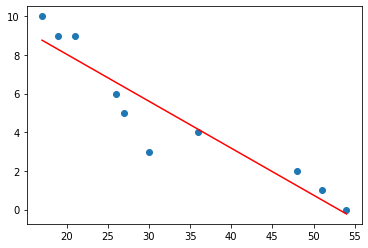

In [ ]:
# Your code here.
plt.scatter(student_data.X, student_data.Y)
plt.plot([student_data.X.min(),student_data.X.max()],[linreg.params.const+linreg.params.X*student_data.X.min(),linreg.params.const+linreg.params.X*student_data.X.max()],color='r')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
print('I would say that with an r-squared value of 88%, we can conclude that there is a linear relationship between the variables.\nThe extremely low p-value also allows us to reject the null hypothesis with a 99.99% confidence level')

I would say that with an r-squared value of 88%, we can conclude that there is a linear relationship between the variables.
The extremely low p-value also allows us to reject the null hypothesis with a 99.99% confidence level


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
# Your response here.
vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()[['CO2 Emission Grams/Mile']][:-1]
# It seems that a lot of the variables provide useful information, but especially Fuel Barrels/Year, and least of all Year

,CO2 Emission Grams/Mile
Year,-0.222300
Cylinders,0.752393
Fuel Barrels/Year,0.986189
Combined MPG,-0.926229
Fuel Cost/Year,0.930865


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 
X = sm.add_constant(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']])
y_emissions = vehicles['CO2 Emission Grams/Mile']
linreg_vehi = sm.OLS(y_emissions, X).fit()
# An Ordinary Least Squares regression model was used

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
print(linreg_vehi.summary())
# We can see that the independent variables as a whole explain almost all the variance of the dependent variable
# An r-squared of 0.981 is very high, and python gives us a p-value of not only the f-test but also all the variable p-tests (probability of how likely the coefficient measured was by chance) 

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                             11:47:45   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
# Your code here. 
party = pd.DataFrame({'inv':[1,3,4,6,8,9,11,14],'att':[1,2,4,4,5,7,8,13]})
party

,inv,att
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

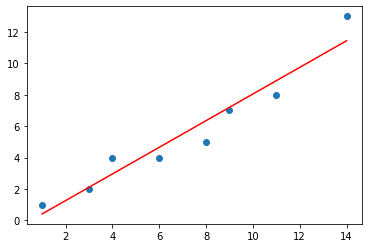

In [23]:
X_inv = sm.add_constant(party.inv)
linreg_party = sm.OLS(party.att, X_inv).fit()
plt.plot([party.inv.min(),party.inv.max()],[linreg_party.params.const+linreg_party.params.inv*party.inv.min(),linreg_party.params.const+linreg_party.params.inv*party.inv.max()],color='r')
plt.scatter(party.inv,party.att)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [24]:
# Your response here. 
print(linreg_party.summary())
# The regression look pretty good except for the last outlier, and the fact that the constant has a high t-test p-value

                            OLS Regression Results                            
Dep. Variable:                    att   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           0.000102
Time:                        11:53:19   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

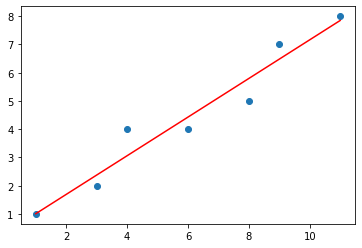

In [25]:
# Your response here. 
X_inv_noo = sm.add_constant(party.inv[:-1])
linreg_party = sm.OLS(party.att[:-1], X_inv_noo).fit()
plt.plot([party.inv[:-1].min(),party.inv[:-1].max()],[linreg_party.params.const+linreg_party.params.inv*party.inv[:-1].min(),linreg_party.params.const+linreg_party.params.inv*party.inv[:-1].max()],color='r')
plt.scatter(party.inv[:-1],party.att[:-1])
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [26]:
# Your response here. 
print(linreg_party.summary())

                            OLS Regression Results                            
Dep. Variable:                    att   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           0.000264
Time:                        11:53:26   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
# The graph without the outlier looks practically perfect, and the r-squared, which was already high, rose a bit.
# Although the t-test p-value for the coefficient is still very high